### Download Overture Maps

In [2]:
import geopandas as gpd
import momepy
import json
import pandas as pd
import folium

In [ ]:
!overturemaps download --help

In [ ]:
bbox = [-3.005517,53.394071,-2.968003,53.414998] # Liverpool city centre

types = [
    "address", "bathymetry", "building", "building_part", "division", 
    "division_area", "division_boundary", "place", "segment", 
    "connector", "infrastructure", "land", "land_cover", "land_use", "water"
]

commands = []
for t in types:
    command = f"!overturemaps download --bbox={','.join(map(str, bbox))} -f geojson --type={t} -o liverpool_{t}.geojson"
    commands.append(command)

for command in commands:
    print(command)

In [ ]:
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=address -o liverpool_address.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=bathymetry -o liverpool_bathymetry.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=building -o liverpool_building.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=building_part -o liverpool_building_part.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=division -o liverpool_division.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=division_area -o liverpool_division_area.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=division_boundary -o liverpool_division_boundary.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=place -o liverpool_place.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=segment -o liverpool_segment.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=connector -o liverpool_connector.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=infrastructure -o liverpool_infrastructure.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=land -o liverpool_land.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=land_cover -o liverpool_land_cover.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=land_use -o liverpool_land_use.geojson
!overturemaps download --bbox=-3.005517,53.394071,-2.968003,53.414998 -f geojson --type=water -o liverpool_water.geojson



### Buildings

In [ ]:
buildings_gdf = gpd.read_file("liverpool_building.geojson")
buildings_gdf.head()

In [ ]:
building_parts_gdf = gpd.read_file("liverpool_building_part.geojson")
building_parts_gdf.head()

In [ ]:
buildings_gdf["subtype"].unique()

In [ ]:
# plot by folium
import folium

m = folium.Map([53.4084, -2.9916], zoom_start=13, tiles="cartodbpositron")

for _, row in buildings_gdf.iterrows():
    popup_text = f"""
    ID: {row['id']}<br>
    Names: {row['names']}<br>
    Subtype: {row['subtype']}<br>
    Class: {row['class']}<br>
    Height: {row['height']}<br>
    """
    folium.GeoJson(
        row.geometry,
        style_function=lambda x, color="blue": {
            'fillColor': color,
            'color': color,
            'weight': 0,
            'fillOpacity': 1
        },
        tooltip=popup_text
    ).add_to(m)

for _, row in building_parts_gdf.iterrows():
    popup_text = f"""
    ID: {row['id']}<br>
    Names: {row['names']}<br>
    Height: {row['height']}<br>
    """
    folium.GeoJson(
        row.geometry,
        style_function=lambda x, color="green": {
            'fillColor': color,
            'color': color,
            'weight': 0,
            'fillOpacity': 1
        },
        tooltip=popup_text
    ).add_to(m)

m

### Segments

In [ ]:
segments_gdf = gpd.read_file("liverpool_segment.geojson")
segments_gdf.head()

In [ ]:
segments_gdf["subtype"].unique()

In [ ]:
# plot by folium
m = folium.Map([53.4084, -2.9916], zoom_start=13, tiles="cartodbpositron")

# Add GeoJson layer with style
folium.GeoJson(
    segments_gdf,
    style_function=lambda feature: {
        'color': 'blue',
        'weight': 2,
        'opacity': 0.6,
    }
).add_to(m)

folium.LayerControl().add_to(m)

m

### Places

In [ ]:
places_gdf = gpd.read_file("liverpool_place.geojson")
places_gdf.head()

In [ ]:
import json
primary_categories = places_gdf["categories"].apply(lambda x: json.loads(x)['primary'] if isinstance(x, str) else None)
for category in primary_categories.unique():
    print(category)

In [ ]:
# Create base map centered on Liverpool
m = folium.Map([53.4084, -2.9916], zoom_start=13, tiles="cartodbpositron")

# Add points without color differentiation
for idx, row in places_gdf.iterrows():
    popup_text = f"""
    Name: {json.loads(row['names'])['primary'] if isinstance(row['names'], str) else None}<br>
    Categories: {json.loads(row['categories'])['primary'] if isinstance(row['categories'], str) else None}<br>
    """
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        popup=folium.Popup(popup_text, max_width=300),  # Set max_width to make the popup wider
        color='blue',  # Use a single color for all points
        fill=True,
        fillColor='blue',
        fillOpacity=0.7
    ).add_to(m)

m


In [ ]:
# create a function that cleans up "building_part" and merge them into "building"
# create a function that partitions the "building" into plot systems (using "connector" (nodes) and "segment" (edges))
# create a function that identifies the adjacency of plot systems to "segment"
# create a function that constructs a networkx graph from "connector" (nodes) and "segment" (edges)
# create a function that flips the networkx graph to the dual graph ("connector" (edges) and "segment" (nodes))
# create a function that maps "place" as POIs onto the plot systems
# create a function that maps "land_use" onto the plot systems
# create a function that converts plot systems and into networkx graph

# memo: since the "connector" and "segment" are from OSM, osmnx can be used to create & manipulate the networkx graph
# memo: the merit of using Overture Maps is the availability of "place" (POIs) mainly from Meta
# memo: the merit of using Overture Maps is the availability of "building" both from OSM and Microsoft ML Buildings
# memo: some of the "place" (POIs) are in the area of "segment"
# memo: "place" (POIs) are not well covered compared to OSM sometimes
# memo: JSON needs to be cleaned up by renaming attributes (in particular, it should be globally standarised for the paper 2)

### Enclosed Tessellations

In [ ]:
buildings_gdf = gpd.read_file("liverpool_building.geojson")
segments_gdf = gpd.read_file("liverpool_segment.geojson")

# Convert to British National Grid (EPSG:27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)
segments_gdf = segments_gdf.to_crs(epsg=27700)

convex_hull = segments_gdf.unary_union.convex_hull
enclosures = momepy.enclosures(segments_gdf, limit=gpd.GeoSeries([convex_hull]))
enclosed_tess = momepy.Tessellation(buildings_gdf, unique_id='id', enclosures=enclosures, segment=1).tessellation
enclosed_tess.head()

In [ ]:
buildings_gdf = gpd.read_file("liverpool_building.geojson")
segments_gdf = gpd.read_file("liverpool_segment.geojson")

# Convert to British National Grid (EPSG:27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)
segments_gdf = segments_gdf.to_crs(epsg=27700)

enclosures = momepy.enclosures(segments_gdf)
enclosed_tess = momepy.Tessellation(buildings_gdf, unique_id='id', enclosures=enclosures).tessellation
enclosed_tess.head()

In [ ]:
# Convert segments to the same CRS as enclosures if needed
segments_gdf = segments_gdf.to_crs(enclosures.crs)

# Use spatial join to find enclosures that include with segments as cal-de-sac
# This is more efficient than iterating through each enclosure and segment
cal_de_sac_enclosures = gpd.sjoin(
    enclosures,
    segments_gdf,
    how="inner",
    predicate="contains"
)

# Create filtered enclosures
enclosures_with_cal_de_sac = enclosures.loc[cal_de_sac_enclosures.index.unique()]

print(f"Found {len(enclosures_with_cal_de_sac)} enclosures containing cal-de-sac out of {len(enclosures)} total enclosures")


# Convert enclosures and segments to the same CRS if needed
segments_cal_de_sac = segments_gdf[
    segments_gdf.geometry.apply(lambda x: any(e.contains(x) for e in enclosures_with_cal_de_sac.geometry))
].copy()

# Print the number of filtered segments
print(f"Found {len(segments_cal_de_sac)} cal-de-sacs within enclosures out of {len(segments_gdf)} total segments")

In [ ]:
# Create base map centered on Liverpool
m = folium.Map([53.4084, -2.9916], zoom_start=13, tiles="cartodbpositron")

# Convert enclosures to WGS84 (EPSG:4326) for folium
enclosures = enclosures.to_crs(epsg=4326)
segments_cal_de_sac = segments_cal_de_sac.to_crs(epsg=4326)

# Plot all enclosures in gray
folium.GeoJson(
    enclosures,
    style_function=lambda x: {
        'fillColor': 'gray',
        'color': 'gray',
        'weight': 1,
        'fillOpacity': 0.1
    }
).add_to(m)

# Plot enclosures with cal-de-sac in red
folium.GeoJson(
    enclosures_with_cal_de_sac,
    style_function=lambda x: {
        'fillColor': 'red',
        'color': 'red',
        'weight': 2,
        'fillOpacity': 0.3
    },
    tooltip=folium.GeoJsonTooltip(fields=['eID'])
).add_to(m)

# Add cal-de-sac segments layer in blue
folium.GeoJson(
    segments_cal_de_sac,
    style_function=lambda x: {
        'color': 'blue',
        'weight': 2,
        'opacity': 0.8
    },
    tooltip=folium.GeoJsonTooltip(fields=['subtype', 'class'])
).add_to(m)

m


In [ ]:
buildings_gdf = gpd.read_file("liverpool_building.geojson")
segments_gdf = gpd.read_file("liverpool_segment.geojson")

# Convert to British National Grid (EPSG:27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)
segments_gdf = segments_gdf.to_crs(epsg=27700)

# Create a dictionary mapping road classes to buffer sizes (in meters)
buffer_sizes = {
    'motorway': 7.5,
    'trunk': 6,
    'primary': 5,
    'secondary': 4,
    'tertiary': 3,
    'residential': 3,
    'service': 1.5,
    'footway': 1,
    'path': 0.5,
    'steps': 0.5,
    'unclassified': 1.5
}

# Create a copy of segments_gdf
segments_buffered = segments_gdf.copy()

# Apply buffer based on road class
for road_class, buffer_size in buffer_sizes.items():
    # Create buffer for segments of this class
    mask = segments_buffered['class'] == road_class
    if mask.any():
        segments_buffered.loc[mask, 'geometry'] = segments_buffered[mask].buffer(buffer_size)

# For any road classes not in our dictionary, use a default buffer of 3 meters
mask = ~segments_buffered['class'].isin(buffer_sizes.keys())
if mask.any():
    segments_buffered.loc[mask, 'geometry'] = segments_buffered[mask].buffer(3)

# Replace the geometry in the original GeoDataFrame
segments_gdf = segments_buffered

In [ ]:
buildings_gdf = gpd.read_file("liverpool_building.geojson")
segments_gdf = gpd.read_file("liverpool_segment.geojson")
places_gdf = gpd.read_file("liverpool_place.geojson")

# Convert to British National Grid (EPSG:27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)
segments_gdf = segments_gdf.to_crs(epsg=27700)

# Generate enclosures
enclosures = momepy.enclosures(segments_gdf)

### Insert process to filter out cal-de-sac segments here ###
# segments_cal_de_sac = ...

# combine buildings_gdf and segments_cal_de_sac
'''segments_cal_de_sac = segments_cal_de_sac.to_crs(buildings_gdf.crs)
buildings_and_segments = gpd.GeoDataFrame(pd.concat([
    buildings_gdf.geometry,
    segments_cal_de_sac.geometry
], ignore_index=True))
'''
enclosed_tess = momepy.enclosed_tessellation(buildings_gdf, enclosures=enclosures, threshold=0.1, segment=0.1)
enclosed_tess.head()

In [ ]:
import folium

# Create base map centered on Liverpool
m = folium.Map([53.4084, -2.9916], zoom_start=13, tiles="cartodbpositron")

# Convert tessellation to WGS84 (EPSG:4326) for folium
enclosed_tess = enclosed_tess.to_crs(epsg=4326)

# Add tessellation polygons to the map
folium.GeoJson(
    enclosed_tess,
    style_function=lambda x: {
        'fillColor': 'none',
        'color': 'red',
        'weight': 1,
        'opacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=['enclosure_index'])
).add_to(m)

# Convert buildings_gdf to WGS84 (EPSG:4326) and add to the map
buildings_gdf = buildings_gdf.to_crs(epsg=4326)

folium.GeoJson(
    buildings_gdf,
    style_function=lambda x, color="blue": {
        'fillColor': color,
        'color': color,
        'weight': 0,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(fields=['id'])
).add_to(m)
# Add GeoJson layer with style
folium.GeoJson(
    segments_gdf.to_crs(epsg=4326),
    style_function=lambda feature: {
        'color': 'blue',
        'weight': 2,
        'opacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=['class', 'subtype'])
).add_to(m)

for idx, row in places_gdf.iterrows():
    popup_text = f"""
    Name: {json.loads(row['names'])['primary'] if isinstance(row['names'], str) else None}<br>
    Categories: {json.loads(row['categories'])['primary'] if isinstance(row['categories'], str) else None}<br>
    """
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        popup=folium.Popup(popup_text, max_width=300),  # Set max_width to make the popup wider
        color='blue',  # Use a single color for all points
        fill=True,
        fillColor='blue',
        fillOpacity=0.7
    ).add_to(m)

m

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString, Polygon

# ------------------------
# 1) Define the Extended Streets
# ------------------------
# Extended boundary box: from (0,0) to (5,12)
bottom_edge = LineString([(0, 0), (5, 0)])
right_edge  = LineString([(5, 0), (5, 12)])
top_edge    = LineString([(5, 12), (0, 12)])
left_edge   = LineString([(0, 12), (0, 0)])

# Define cul-de-sacs:
# Cul_de_Sac 1 and Cul_de_Sac 2 branch from the left edge as before.
cul_de_sac_1 = LineString([(0, 2), (2, 2), (2, 3)])
cul_de_sac_2 = LineString([(0, 6), (2, 6), (2, 5)])
# Cul_de_Sac 3 now starts at (0,10) (top-left corner) and runs horizontally to (3,10) then turns downward to (3,9)
cul_de_sac_3 = LineString([(0, 10), (3, 10), (3, 9)])
# Add cul-de-sac on the right side:
# Cul_de_Sac 4 starts at the right edge at (5,8), runs horizontally inward to (3.5,8), and then turns upward to (3.5,9)
cul_de_sac_4 = LineString([(5, 8), (3.5, 8), (3.5, 9)])

# Combine street geometries into a GeoDataFrame
streets_data = {
    'name': [
        'Bottom Edge',
        'Right Edge',
        'Top Edge',
        'Left Edge',
        'Cul-de-Sac 1',
        'Cul-de-Sac 2',
        'Cul-de-Sac 3',
        'Cul-de-Sac 4'
    ],
    'geometry': [
        bottom_edge,
        right_edge,
        top_edge,
        left_edge,
        cul_de_sac_1,
        cul_de_sac_2,
        cul_de_sac_3,
        cul_de_sac_4
    ]
}
cds_streets_gdf = gpd.GeoDataFrame(streets_data, crs="EPSG:3857")

# ------------------------
# 2) Define Larger, Non-Overlapping Buildings
# ------------------------
# Each building is a 1.2×1.2 polygon with a gap of 0.2 from the associated street.
# For each cul-de-sac, the horizontal segment is used to set the vertical gap from the road.
#
# ---- Cul_de_Sac 1 (horizontal segment at y = 2) ----
# North building: placed above the street (bottom edge = 2 + 0.2, top edge = 2 + 0.2 + 1.2).
bld_cds1_north = Polygon([
    (0.4, 2.2), (1.6, 2.2),
    (1.6, 3.4), (0.4, 3.4)
])
# South building: placed below the street (top edge = 2 - 0.2, bottom edge = 2 - 0.2 - 1.2).
bld_cds1_south = Polygon([
    (0.4, 0.6), (1.6, 0.6),
    (1.6, 1.8), (0.4, 1.8)
])

# ---- Cul_de_Sac 2 (horizontal segment at y = 6) ----
# North building: bottom edge = 6 + 0.2, top edge = 6 + 0.2 + 1.2.
bld_cds2_north = Polygon([
    (0.4, 6.2), (1.6, 6.2),
    (1.6, 7.4), (0.4, 7.4)
])
# South building: top edge = 6 - 0.2, bottom edge = 6 - 0.2 - 1.2.
bld_cds2_south = Polygon([
    (0.4, 4.6), (1.6, 4.6),
    (1.6, 5.8), (0.4, 5.8)
])

# ---- Cul_de_Sac 3 (horizontal segment at y = 10, centered near x = 1.5) ----
# North building: bottom edge = 10 + 0.2, top edge = 10 + 0.2 + 1.2.
bld_cds3_north = Polygon([
    (0.9, 10.2), (2.1, 10.2),
    (2.1, 11.4), (0.9, 11.4)
])
# South building: top edge = 10 - 0.2, bottom edge = 10 - 0.2 - 1.2.
bld_cds3_south = Polygon([
    (0.9, 8.6), (2.1, 8.6),
    (2.1, 9.8), (0.9, 9.8)
])

# ---- Cul_de_Sac 4 (horizontal segment at y = 8 from the right side) ----
# For the right-side cul-de-sac, we use a similar gap specification.
# North building: placed above the horizontal segment at y = 8.
# Horizontal offset: with a gap from the right edge, we set x from 3.4 to 4.6.
bld_cds4_north = Polygon([
    (3.4, 8.2), (4.6, 8.2),
    (4.6, 9.4), (3.4, 9.4)
])
# South building: placed below the horizontal segment at y = 8.
bld_cds4_south = Polygon([
    (3.4, 6.6), (4.6, 6.6),
    (4.6, 7.8), (3.4, 7.8)
])

# Collect all building polygons into a list
building_polygons = [
    bld_cds1_north,
    bld_cds1_south,
    bld_cds2_north,
    bld_cds2_south,
    bld_cds3_north,
    bld_cds3_south,
    bld_cds4_north,
    bld_cds4_south
]

building_data = {
    'building_id': list(range(1, len(building_polygons) + 1)),
    'geometry': building_polygons
}

cds_buildings_gdf = gpd.GeoDataFrame(building_data, crs="EPSG:3857")

# ------------------------
# Output the GeoDataFrames for inspection
# ------------------------
print("Extended Streets GeoDataFrame:")
print(cds_streets_gdf)
print("\nExtended Buildings GeoDataFrame:")
print(cds_buildings_gdf)

In [ ]:
import geopandas as gpd
from shapely.geometry import LineString, Polygon

# ------------------------
# 1) Define Bounding Box & Main Vertical Street (all coordinates * 10)
# ------------------------
bottom_edge = LineString([(0, 0), (80, 0)])
right_edge  = LineString([(80, 0), (80, 120)])
top_edge    = LineString([(80, 120), (0, 120)])
left_edge   = LineString([(0, 120), (0, 0)])

# Main vertical street from x=40, y=0 to y=110
main_vertical = LineString([(40, 0), (40, 110)])

# ------------------------
# 2) Define Three Cul-de-Sacs (All 30 Units Long)
# ------------------------
cul_left_bottom = LineString([(10, 30), (40, 30)])
cul_left_top    = LineString([(10, 90), (40, 90)])
cul_right_middle = LineString([(40, 60), (70, 60)])

streets_data = {
    'name': [
        'Bottom Edge', 'Right Edge', 'Top Edge', 'Left Edge',
        'Main Vertical',
        'Left Cul-de-Sac (Bottom)',
        'Left Cul-de-Sac (Top)',
        'Right Cul-de-Sac (Middle)'
    ],
    'geometry': [
        bottom_edge, right_edge, top_edge, left_edge,
        main_vertical,
        cul_left_bottom, cul_left_top, cul_right_middle
    ]
}
cds_streets_gdf = gpd.GeoDataFrame(streets_data, crs="EPSG:3857")

# ------------------------
# 3) Define Buildings (all coordinates * 10)
# ------------------------
bld_left_bot_top = Polygon([
    (15, 32), (35, 32),
    (35, 38), (15, 38)
])
bld_left_bot_bottom = Polygon([
    (15, 22), (35, 22),
    (35, 28), (15, 28)
])

bld_left_top_top = Polygon([
    (15, 92), (35, 92),
    (35, 98), (15, 98)
])
bld_left_top_bottom = Polygon([
    (15, 82), (35, 82),
    (35, 88), (15, 88)
])

bld_right_mid_top = Polygon([
    (45, 62), (65, 62),
    (65, 68), (45, 68)
])
bld_right_mid_bottom = Polygon([
    (45, 52), (65, 52),
    (65, 58), (45, 58)
])

building_polygons = [
    bld_left_bot_top, 
    bld_left_bot_bottom,
    bld_left_top_top,
    bld_left_top_bottom,
    bld_right_mid_top,
    bld_right_mid_bottom
]
building_data = {
    'building_id': list(range(1, len(building_polygons) + 1)),
    'geometry': building_polygons
}
cds_buildings_gdf = gpd.GeoDataFrame(building_data, crs="EPSG:3857")

print("Streets GeoDataFrame:")
print(cds_streets_gdf)
print("\nBuildings GeoDataFrame:")
print(cds_buildings_gdf)


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Plot streets in blue
cds_streets_gdf.plot(ax=ax, color='blue', linewidth=2)

# Plot buildings in red with some transparency
cds_buildings_gdf.plot(ax=ax, color='red')

# Add title
plt.title('Cul-de-Sac Streets and Buildings')

# Show the plot
plt.show()

In [ ]:
# Create enclosures and enclosed tessellation
cds_enclosures = momepy.enclosures(cds_streets_gdf)
cds_enclosures = cds_enclosures.difference(cds_streets_gdf.unary_union.buffer(1))

cds_enclosed_tess = momepy.enclosed_tessellation(cds_enclosures, cds_enclosures)

In [ ]:
# plot the enclosed tessellation
fig, ax = plt.subplots(figsize=(5, 5))

# Plot streets in blue
cds_streets_gdf.plot(ax=ax, color='blue', alpha=1, linewidth=2)

# Plot buildings in red with some transparency
cds_buildings_gdf.plot(ax=ax, color='red', alpha=1)

# Plot enclosed tessellation in green
cds_enclosed_tess.plot(ax=ax, color='red', alpha=0.5, edgecolor='black', linestyle='--')

# Add title
plt.title('Cul-de-Sac Streets, Buildings, and Enclosed Tessellation')

# Show the plot
plt.show()

$$ \text{width} = \frac{x_{\max} - x_{\min}}{cell\_size},\ \text{hight} = \frac{y_{\max} - y_{\min}}{cell\_size} $$

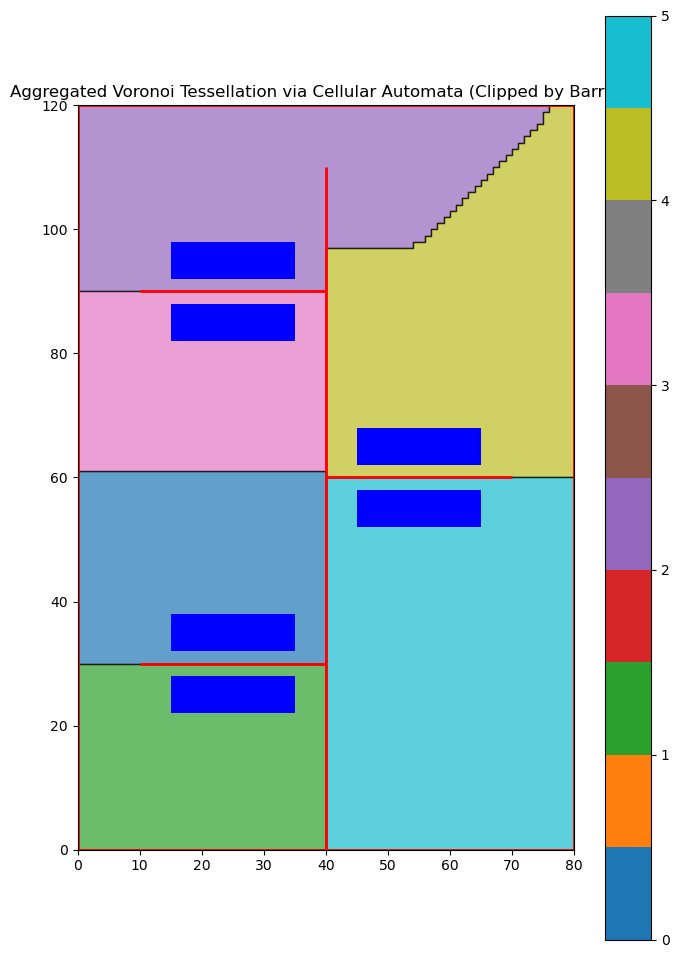

In [3]:
from collections import deque, Counter
from typing import Tuple, List
from enum import Enum
from geopandas import GeoSeries, GeoDataFrame
import matplotlib.pyplot as plt
import numpy as np
import shapely
import shapely.ops
import shapely.prepared
import math

# ------------------------------------------------------------------
# State Constants
# ------------------------------------------------------------------
class CellState(Enum):
    """
    Enumeration of cell states for grid processing.

    Attributes:
        UNKNOWN: Cell has not been processed.
        BOUNDARY: Cell is at a junction between different seed regions.
        BARRIER: Cell originally designated as a barrier.
        FRONTIER: Cell queued for BFS expansion.
    """
    UNKNOWN = -1
    BOUNDARY = -2
    BARRIER = -3
    FRONTIER = -4


# ------------------------------------------------------------------------------
# Helper Functions
# ------------------------------------------------------------------------------
def _get_cell_polygon(
    x_idx: int, y_idx: int, cell_size: float = 1.0, origin: Tuple[float, float] = (0, 0)
) -> shapely.geometry.Polygon:
    """
    Generate a grid cell polygon based on the given indices, cell size, and origin.
    """
    ox, oy = origin
    return shapely.geometry.Polygon(
        [
            (ox + x_idx * cell_size, oy + y_idx * cell_size),
            (ox + (x_idx + 1) * cell_size, oy + y_idx * cell_size),
            (ox + (x_idx + 1) * cell_size, oy + (y_idx + 1) * cell_size),
            (ox + x_idx * cell_size, oy + (y_idx + 1) * cell_size),
        ]
    )


def _get_neighbors(
    x: int, y: int, max_x: int, max_y: int, mode: str = "moore"
) -> List[Tuple[int, int]]:
    """
    Retrieve valid neighboring cell indices based on connectivity.
    """
    neighbor_dirs = {
        "moore": [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)],
        "neumann": [(0, -1), (-1, 0), (1, 0), (0, 1)],
    }
    directions = neighbor_dirs.get(mode)
    if directions is None:
        raise ValueError("Invalid neighbor_mode: choose 'moore' or 'neumann'")
    return [
        (x + dx, y + dy)
        for dx, dy in directions
        if 0 <= x + dx < max_x and 0 <= y + dy < max_y
    ]


def _get_grid_bounds(
    seed_geoms: GeoSeries | GeoDataFrame,
    barrier_geoms: GeoSeries | GeoDataFrame,
    cell_size: float,
) -> Tuple[Tuple[float, float], int, int]:
    """
    Compute the grid bounds required to cover both seed and barrier geometries.
    """
    seed_bounds = seed_geoms.total_bounds  # [xmin, ymin, xmax, ymax]
    barrier_bounds = barrier_geoms.total_bounds

    xmin = min(seed_bounds[0], barrier_bounds[0])
    ymin = min(seed_bounds[1], barrier_bounds[1])
    xmax = max(seed_bounds[2], barrier_bounds[2])
    ymax = max(seed_bounds[3], barrier_bounds[3])
    grid_width = math.ceil((xmax - xmin) / cell_size)
    grid_height = math.ceil((ymax - ymin) / cell_size)
    return (xmin, ymin), grid_width, grid_height


def _geom_to_cells(
    geom: shapely.geometry,
    origin: Tuple[float, float],
    cell_size: float,
    grid_width: int,
    grid_height: int,
) -> List[Tuple[int, int]]:
    """
    Determine grid cell indices that intersect the given geometry.
    """
    if isinstance(geom, shapely.geometry.Point):
        sx = int((geom.x - origin[0]) // cell_size)
        sy = int((geom.y - origin[1]) // cell_size)
        return [(sx, sy)] if 0 <= sx < grid_width and 0 <= sy < grid_height else []

    else:
        minx, miny, maxx, maxy = geom.bounds
        start_x = max(0, int((minx - origin[0]) // cell_size))
        start_y = max(0, int((miny - origin[1]) // cell_size))
        end_x = min(grid_width, int(math.ceil((maxx - origin[0]) / cell_size)))
        end_y = min(grid_height, int(math.ceil((maxy - origin[1]) / cell_size)))

        x_range = np.arange(start_x, end_x)
        y_range = np.arange(start_y, end_y)
        xx, yy = np.meshgrid(x_range, y_range)
        candidate_polys = GeoSeries(
            [
                _get_cell_polygon(x, y, cell_size, origin)
                for x, y in zip(xx.flatten(), yy.flatten())
            ]
        )
        mask = candidate_polys.intersects(geom)
        return list(zip(xx.flatten()[mask], yy.flatten()[mask]))


def _enqueue_neighbors(
    x: int,
    y: int,
    states: np.ndarray,
    grid_width: int,
    grid_height: int,
    neighbor_mode: str,
    queue: deque,
) -> None:
    """
    Enqueue valid neighboring cells for BFS expansion.
    """
    for nx, ny in _get_neighbors(x, y, grid_width, grid_height, mode=neighbor_mode):
        if states[ny, nx] == CellState.UNKNOWN.value:
            states[ny, nx] = CellState.FRONTIER.value
            queue.append((nx, ny))


def _assign_adjacent_seed_cells(
    states: np.ndarray, neighbor_mode: str = "moore"
) -> np.ndarray:
    """
    Reassign border and barrier cells to the proximate seed areas using a voting mechanism.
    """
    new_states = states.copy()
    indices = np.argwhere(
        np.isin(states, [CellState.BARRIER.value, CellState.BOUNDARY.value])
    )
    grid_height, grid_width = states.shape

    for y, x in indices:
        neighbor_seeds = [
            states[ny, nx]
            for nx, ny in _get_neighbors(
                x, y, grid_width, grid_height, mode=neighbor_mode
            )
            if states[ny, nx] >= 0
        ]
        if neighbor_seeds:
            cnt = Counter(neighbor_seeds)
            # In case of ties, choose the smaller seed id.
            chosen_seed = min(cnt.items(), key=lambda item: (-item[1], item[0]))[0]
            new_states[y, x] = chosen_seed
    return new_states


# ------------------------------------------------------------------------------
# Combined Main Function: _voronoi_by_ca
# ------------------------------------------------------------------------------
def _voronoi_by_ca(
    seed_geoms: GeoSeries | GeoDataFrame,
    barrier_geoms: shapely.geometry.Polygon | GeoSeries | GeoDataFrame,
    cell_size: float = 1.0,
    neighbor_mode: str = "moore",
    fulfill: bool = True,
) -> GeoDataFrame:
    """
    Generate an aggregated Voronoi diagram as a GeoDataFrame via a cellular automata technique.

    This unified function performs the following:
      - Ensures that the CRS of seed and barrier geometries are aligned.
      - Computes grid bounds covering both seed and barrier geometries.
      - Marks barrier cells using a prepared geometry for fast intersection.
      - Seeds the grid with seed geometries.
      - Propagates seed values via a BFS expansion that respects barriers.
      - Uses a voting mechanism to finalize boundary cell assignments.
      - Converts grid cells into a GeoDataFrame and dissolves adjacent cells
        with the same seed id.
      - Clips the output cells by the barrier boundaries.

    Parameters:
        seed_geoms: GeoDataFrame containing seed features.
        barrier_geoms: GeoDataFrame containing barrier features or a shapely Polygon.
        cell_size: Grid cell size.
        neighbor_mode: Choice of neighbor connectivity ('moore' or 'neumann').

    Returns:
        A GeoDataFrame representing the aggregated Voronoi tessellation, clipped by barriers.
    """

    # -------------------------------
    # CRS Alignment: Ensure barrier_geoms and seed_geoms share the same CRS.
    # -------------------------------
    if isinstance(barrier_geoms, (shapely.geometry.Polygon, shapely.geometry.LineString)):
        barrier_geoms = GeoSeries([barrier_geoms], crs=seed_geoms.crs)
    elif isinstance(barrier_geoms, shapely.geometry.GeometryCollection):
        # Extract only the components that make sense for barriers (e.g., Polygon and LineString)
        extracted_geoms = [
            geom for geom in barrier_geoms.geoms
            if isinstance(geom, (shapely.geometry.Polygon, shapely.geometry.LineString))
        ]
        # You might want to validate that extracted_geoms is non-empty.
        if not extracted_geoms:
            raise ValueError("No valid barrier geometries found in the GeometryCollection.")
        barrier_geoms = GeoSeries(extracted_geoms, crs=seed_geoms.crs)


    # Compute grid bounds
    origin, grid_width, grid_height = _get_grid_bounds(
        seed_geoms, barrier_geoms, cell_size
    )

    # Prepare barrier geometries if provided.
    barrier_union = None
    prep_barrier = None
    if not barrier_geoms.empty:
        barrier_union = shapely.ops.unary_union(barrier_geoms.geometry)
        prep_barrier = shapely.prepared.prep(barrier_union)

    # Initialize grid states with UNKNOWN values.
    states = np.full((grid_height, grid_width), CellState.UNKNOWN.value, dtype=int)

    # Mark barrier cells in the grid.
    if prep_barrier is not None:
        xs, ys = np.meshgrid(np.arange(grid_width), np.arange(grid_height))
        cell_polys = GeoSeries(
            [
                _get_cell_polygon(x, y, cell_size, origin)
                for x, y in zip(xs.flatten(), ys.flatten())
            ]
        )
        barrier_mask = cell_polys.intersects(barrier_union).values.reshape(
            (grid_height, grid_width)
        )
        states[barrier_mask] = CellState.BARRIER.value

    # Seed the grid with seed geometries.
    for site_id, geom in enumerate(seed_geoms.geometry):
        if not geom.is_empty:
            cells = _geom_to_cells(geom, origin, cell_size, grid_width, grid_height)
            valid_cells = [
                (x, y) for x, y in cells if states[y, x] == CellState.UNKNOWN.value
            ]
            if valid_cells:
                indices = np.array(valid_cells)
                states[indices[:, 1], indices[:, 0]] = site_id

    # Initialize the BFS queue with all seeded cells’ neighbors.
    queue = deque()
    seed_indices = np.argwhere(states >= 0)
    for y, x in seed_indices:
        _enqueue_neighbors(x, y, states, grid_width, grid_height, neighbor_mode, queue)

    # Process BFS to propagate seed values.
    while queue:
        x_current, y_current = queue.popleft()
        if states[y_current, x_current] != CellState.FRONTIER.value:
            continue

        neighbor_seeds = [
            states[ny, nx]
            for nx, ny in _get_neighbors(
                x_current, y_current, grid_width, grid_height, mode=neighbor_mode
            )
            if states[ny, nx] >= 0
        ]
        if not neighbor_seeds:
            continue

        # Assign as a boundary if multiple seed ids are found.
        if len(set(neighbor_seeds)) > 1:
            states[y_current, x_current] = CellState.BOUNDARY.value
        else:
            assigned_seed = set(neighbor_seeds).pop()
            states[y_current, x_current] = assigned_seed
            _enqueue_neighbors(
                x_current,
                y_current,
                states,
                grid_width,
                grid_height,
                neighbor_mode,
                queue,
            )

    # Post-process barrier and boundary cells using a voting mechanism.
    if fulfill:
        states = _assign_adjacent_seed_cells(states, neighbor_mode)

    # Create grid cell polygons and build the GeoDataFrame.
    xs, ys = np.meshgrid(np.arange(grid_width), np.arange(grid_height))
    grid_polys = [
        _get_cell_polygon(x, y, cell_size, origin)
        for x, y in zip(xs.flatten(), ys.flatten())
    ]
    grid_gdf = GeoDataFrame(
        {"site_id": states.flatten()}, geometry=grid_polys, crs=seed_geoms.crs
    )

    # Include only cells with valid seed assignments and dissolve contiguous regions.
    grid_gdf = grid_gdf[grid_gdf["site_id"] >= 0].dissolve(by="site_id").reset_index()

    # Clip by barriers
    if barrier_geoms is not None and (not barrier_geoms.empty):
        # Create a union of the barrier geometries.
        barrier_union = shapely.ops.unary_union(barrier_geoms.geometry)
        # If the barrier union is not a polygon (e.g., it's a MultiLineString), polygonize it.
        if not isinstance(barrier_union, (shapely.geometry.Polygon, shapely.geometry.MultiPolygon)):
            barrier_polys = list(shapely.ops.polygonize(barrier_union))
            if barrier_polys:
                barrier_union = shapely.ops.unary_union(barrier_polys)
        # Clip each polygon in the grid using the barrier boundary.
        grid_gdf["geometry"] = grid_gdf["geometry"].intersection(barrier_union)

    return grid_gdf


# ------------------------------------------------------------------------------
# Sample Usage and Visualization
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    # Define sample seed geometries (in this example, buildings)
    seed_polygons = [
        shapely.geometry.Polygon([(15, 32), (35, 32), (35, 38), (15, 38)]),
        shapely.geometry.Polygon([(15, 22), (35, 22), (35, 28), (15, 28)]),
        shapely.geometry.Polygon([(15, 92), (35, 92), (35, 98), (15, 98)]),
        shapely.geometry.Polygon([(15, 82), (35, 82), (35, 88), (15, 88)]),
        shapely.geometry.Polygon([(45, 62), (65, 62), (65, 68), (45, 68)]),
        shapely.geometry.Polygon([(45, 52), (65, 52), (65, 58), (45, 58)]),
    ]
    building_data = {
        "building_id": list(range(1, len(seed_polygons) + 1)),
        "geometry": seed_polygons,
    }
    seed_gdf = GeoDataFrame(building_data, crs="EPSG:3857")

    # Define sample barrier geometries.
    barrier_geoms = [
        shapely.geometry.LineString([(0, 0), (80, 0)]),
        shapely.geometry.LineString([(80, 0), (80, 120)]),
        shapely.geometry.LineString([(80, 120), (0, 120)]),
        shapely.geometry.LineString([(0, 120), (0, 0)]),
        shapely.geometry.LineString([(40, 0), (40, 110)]),
        shapely.geometry.LineString([(10, 30), (40, 30)]),
        shapely.geometry.LineString([(10, 90), (40, 90)]),
        shapely.geometry.LineString([(40, 60), (70, 60)]),
    ]
    barrier_data = {
        "name": [
            "Bottom Edge",
            "Right Edge",
            "Top Edge",
            "Left Edge",
            "Main Vertical",
            "Left Cul-de-Sac (Bottom)",
            "Left Cul-de-Sac (Top)",
            "Right Cul-de-Sac (Middle)",
        ],
        "geometry": barrier_geoms,
    }
    
    barrier_gdf = GeoDataFrame(barrier_data, crs="EPSG:3857")

    # Adjust cell size as needed.
    cell_size = 1.0
    voronoi_gdf = _voronoi_by_ca(
        seed_gdf, barrier_gdf, cell_size, neighbor_mode="moore", fulfill=True
    )

    # Visualization using matplotlib.
    fig, ax = plt.subplots(1, 1, figsize=(8, 12))
    voronoi_gdf.plot(
        ax=ax, column="site_id", cmap="tab10", alpha=0.7, legend=True, edgecolor="black"
    )
    barrier_gdf.plot(ax=ax, color="red", linewidth=2, label="Barriers")
    seed_gdf.plot(ax=ax, color="blue", marker="*", markersize=100, label="Seeds")
    xmin, ymin, xmax, ymax = voronoi_gdf.total_bounds
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect("equal")
    ax.set_title("Aggregated Voronoi Tessellation via Cellular Automata (Clipped by Barriers)")
    plt.show()

In [1]:
import warnings

import geopandas as gpd
import libpysal
import math
import numpy as np
import pandas as pd
import shapely
from collections import deque, Counter
from enum import Enum
from geopandas import GeoDataFrame, GeoSeries
from joblib import Parallel, delayed
from libpysal.cg import voronoi_frames
from libpysal.graph import Graph
from packaging.version import Version
from pandas import MultiIndex, Series
from typing import Tuple, List

GPD_GE_013 = Version(gpd.__version__) >= Version("0.13.0")
GPD_GE_10 = Version(gpd.__version__) >= Version("1.0dev")
LPS_GE_411 = Version(libpysal.__version__) >= Version("4.11.dev")

__all__ = [
    "morphological_tessellation",
    "enclosed_tessellation",
    "verify_tessellation",
    "get_nearest_street",
    "get_nearest_node",
    "generate_blocks",
    "buffered_limit",
]


def morphological_tessellation(
    geometry: GeoSeries | GeoDataFrame,
    clip: str | shapely.Geometry | GeoSeries | GeoDataFrame | None = "bounding_box",
    shrink: float = 0.4,
    segment: float = 0.5,
) -> GeoDataFrame:
    """Generate morphological tessellation.

    Morpohological tessellation is a method to divide space into cells based on
    building footprints and Voronoi tessellation. The function wraps
    :func:`libpysal.cg.voronoi_frames` and provides customized default parameters
    following :cite:`fleischmann2020`.

    Tessellation requires data of relatively high level of precision
    and there are three particular patterns causing issues:

    1. Features will collapse into empty polygon - these
       do not have tessellation cell in the end.
    2. Features will split into MultiPolygons - in some cases,
       features with narrow links between parts split into two
       during 'shrinking'. In most cases that is not an issue
       and the resulting tessellation is correct anyway, but
       sometimes this results in a cell being a MultiPolygon,
       which is not correct.
    3. Overlapping features - features which overlap even
       after 'shrinking' cause invalid tessellation geometry.

    All three types can be tested using :class:`momepy.CheckTessellationInput`.

    See :cite:`fleischmann2020` for details of implementation.

    Parameters
    ----------
    geometry : GeoSeries | GeoDataFrame
        A GeoDataFrame or GeoSeries containing buildings to tessellate the space around.
    clip : str | shapely.Geometry | GeoSeries | GeoDataFrame | None
        Polygon used to clip the Voronoi polygons, by default "bounding_box". You can
        pass any option accepted by :func:`libpysal.cg.voronoi_frames` or geopandas
        object that will be automatically unioned.
    shrink : float, optional
        The distance for negative buffer to generate space between adjacent polygons).
        By default 0.4
    segment : float, optional
        The maximum distance between points after discretization. By default 0.5

    Returns
    -------
    GeoDataFrame
        GeoDataFrame with an index matching the index of input geometry

    See also
    --------
    momepy.enclosed_tessellation
    momepy.CheckTessellationInput
    momepy.verify_tessellation

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")

    Define a limit used to clip the extent:

    >>> limit = momepy.buffered_limit(buildings, buffer="adaptive")

    Generate tessellation:

    >>> momepy.morphological_tessellation(buildings).head()
                                                geometry
    0  POLYGON ((1603577.153 6464348.291, 1603576.946...
    1  POLYGON ((1603166.356 6464326.62, 1603166.425 ...
    2  POLYGON ((1603006.941 6464167.63, 1603009.97 6...
    3  POLYGON ((1602995.269 6464132.007, 1603001.768...
    4  POLYGON ((1603084.231 6464104.386, 1603083.773...

    """

    if isinstance(geometry.index, MultiIndex):
        raise ValueError(
            "MultiIndex is not supported in `momepy.morphological_tessellation`."
        )

    if isinstance(clip, GeoSeries | GeoDataFrame):
        clip = clip.union_all() if GPD_GE_10 else clip.unary_union

    return voronoi_frames(
        geometry,
        clip=clip,
        shrink=shrink,
        segment=segment,
        return_input=False,
        as_gdf=True,
    )


def enclosed_tessellation(
    geometry: GeoSeries | GeoDataFrame,
    enclosures: GeoSeries | GeoDataFrame,
    shrink: float = 0.4,
    segment: float = 0.5,
    threshold: float = 0.05,
    n_jobs: int = -1,
    use_ca: bool = False,
    cell_size: float = 1.0,
    neighbor_mode: str = "moore",
    fulfill: bool = False,
    barriers_for_inner: GeoSeries | GeoDataFrame = None,
) -> GeoDataFrame:
    """Generate enclosed tessellation

    Enclosed tessellation is an enhanced :func:`morphological_tessellation`, based on
    predefined enclosures and building footprints. We can see enclosed tessellation as
    two-step partitioning of space based on building footprints and boundaries (e.g.
    street network, railway). Original morphological tessellation is used under the hood
    to partition each enclosure.

    Tessellation requires data of relatively high level of precision and there are three
    particular patterns causing issues:

    1. Features will collapse into empty polygon - these
       do not have tessellation cell in the end.
    2. Features will split into MultiPolygons - in some cases,
       features with narrow links between parts split into two during 'shrinking'.
       In most cases that is not an issue and the resulting tessellation is correct
       anyway, but sometimes this results in a cell being a MultiPolygon, which is
       not correct.
    3. Overlapping features - features which overlap even
       after 'shrinking' cause invalid tessellation geometry.

    All three types can be tested using :class:`momepy.CheckTessellationInput`.

    The index of the resulting GeoDataFrame links the input buildings with the output
    geometry. Enclosures with no buildings are also included in the output with negative
    index. Ensure that the input geometry has unique non-negative index for this to work
    correctly.

    Parameters
    ----------
    geometry : GeoSeries | GeoDataFrame
        A GeoDataFrame or GeoSeries containing buildings to tessellate the space around.
    enclosures : GeoSeries | GeoDataFrame
        The enclosures geometry, which can be generated using :func:`momepy.enclosures`.
    shrink : float, optional
        The distance for negative buffer to generate space between adjacent polygons).
        By default 0.4
    segment : float, optional
        The maximum distance between points after discretization. By default 0.5
    threshold : float, optional
        The minimum threshold for a building to be considered within an enclosure.
        Threshold is a ratio of building area which needs to be within an enclosure to
        inlude it in the tessellation of that enclosure. Resolves sliver geometry
        issues. If None, the check is skipped and all intersecting buildings are
        considered. By default 0.05
    n_jobs : int, optional
        The number of jobs to run in parallel. -1 means using all available cores.
        By default -1

    Warnings
    --------
    Due to the floating point precision issues in clipping the tessellation cells to the
    extent of their parental enclosures, the result does not form a precise polygonal
    coverage. To build a contiguity graph, use fuzzy contiguity builder with a small
    buffer, e.g.::

        from libpysal import graph

        graph.Graph.build_fuzzy_contiguity(tessellation, buffer=1e-6)

    Returns
    -------
    GeoDataFrame
        GeoDataFrame with an index matching the index of input geometry and a column
        matching the index of input enclosures.

    See also
    --------
    momepy.enclosures
    momepy.morphological_tessellation
    momepy.CheckTessellationInput
    momepy.verify_tessellation

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")
    >>> streets = geopandas.read_file(path, layer="streets")

    Generate enclosures:

    >>> enclosures = momepy.enclosures(streets)

    Generate tessellation:

    >>> momepy.enclosed_tessellation(buildings, enclosures).head()
                                                  geometry  enclosure_index
    0    POLYGON ((1603572.779 6464354.58, 1603572.505 ...                0
    113  POLYGON ((1603543.601 6464322.376, 1603543.463...                0
    114  POLYGON ((1603525.157 6464283.592, 1603524.725...                0
    125  POLYGON ((1603601.446 6464256.455, 1603600.982...                0
    126  POLYGON ((1603528.593 6464221.033, 1603527.796...                0
    """

    if isinstance(geometry.index, MultiIndex):
        raise ValueError(
            "MultiIndex is not supported in `momepy.enclosed_tessellation`."
        )

    # convert to GeoDataFrame and add position (we will need it later)
    enclosures = enclosures.geometry.to_frame()
    enclosures["position"] = range(len(enclosures))

    # preserve index name if exists
    index_name = enclosures.index.name
    if not index_name:
        index_name = "enclosure_index"
    enclosures[index_name] = enclosures.index

    # figure out which enlosures contain which buildings
    if GPD_GE_013:
        inp, res = geometry.sindex.query(enclosures.geometry, predicate="intersects")
    else:
        inp, res = geometry.sindex.query_bulk(
            enclosures.geometry, predicate="intersects"
        )

    # find out which enclosures contain one and multiple buildings
    unique, counts = np.unique(inp, return_counts=True)
    splits = unique[counts > 1]
    single = unique[counts == 1]
    altered = unique[counts > 0]

    # prepare input for parallel processing
    tuples = [
        (
            enclosures.index[i],  # enclosure index
            enclosures.geometry.iloc[i],  # enclosure geometry
            geometry.iloc[res[inp == i]],  # buildings within the enclosure
        )
        for i in splits
    ]

    # generate tessellation in parallel
    new = Parallel(n_jobs=n_jobs)(
        delayed(_tess)(
            *t,
            threshold,
            shrink,
            segment,
            index_name,
            use_ca,
            cell_size,
            neighbor_mode,
            fulfill,
            barriers_for_inner,
        )
        for t in tuples
    )

    new_df = pd.concat(new, axis=0)

    # some enclosures had building intersections that did not meet the threshold
    if -1 in new_df.index:
        unchanged_in_new = new_df.loc[[-1]]
        new_df = new_df.drop(-1)
        clean_blocks = pd.concat(
            [
                enclosures.drop(enclosures.index[altered]).drop(columns="position"),
                unchanged_in_new,
            ]
        )
    else:
        clean_blocks = enclosures.drop(enclosures.index[altered]).drop(
            columns="position"
        )

    # assign negative index to enclosures with no buildings
    clean_blocks.index = range(-len(clean_blocks), 0, 1)

    # get building index for enclosures with single building
    singles = enclosures.iloc[single]
    singles.index = singles.position.loc[singles.index].apply(
        lambda ix: geometry.iloc[res[inp == ix]].index[0]
    )
    # combine results
    return pd.concat([new_df, singles.drop(columns="position"), clean_blocks])


def _tess(
    ix,
    poly,
    blg,
    threshold,
    shrink,
    segment,
    enclosure_id,
    use_ca,
    cell_size,
    neighbor_mode,
    fulfill,
    barriers_for_inner,
):
    """Generate tessellation for a single enclosure. Helper for enclosed_tessellation"""
    # check if threshold is set and filter buildings based on the threshold
    if threshold:
        if isinstance(poly, shapely.geometry.Polygon):
            blg = blg[
                shapely.area(shapely.intersection(blg.geometry.array, poly))
                > (shapely.area(blg.geometry.array) * threshold)
            ]
        else:
            blg = blg[
                shapely.area(
                    shapely.intersection(
                        blg.geometry.array, shapely.geometry.Polygon(poly.boundary)
                    )
                )
                > (shapely.area(blg.geometry.array) * threshold)
            ]

    if len(blg) > 1:
        if not use_ca:
            tess = voronoi_frames(
                blg,
                clip=poly,
                shrink=shrink,
                segment=segment,
                return_input=False,
                as_gdf=True,
            )
        else:
            tess = _voronoi_by_ca(
                seed_geoms=blg,
                barrier_geoms=poly,
                cell_size=cell_size,
                neighbor_mode=neighbor_mode,
                fulfill=fulfill,
                barriers_for_inner=barriers_for_inner,
            )
        tess[enclosure_id] = ix
        return tess

    ## in case a single building is left in blg
    if len(blg) == 1:
        assigned_ix = blg.index[0]
    else:
        assigned_ix = -1

    return GeoDataFrame(
        {enclosure_id: ix},
        geometry=[poly],
        index=[assigned_ix],
        crs=blg.crs,
    )


def _voronoi_by_ca(
    seed_geoms: GeoSeries | GeoDataFrame,
    barrier_geoms: GeoSeries | GeoDataFrame,
    cell_size: float = 1.0,
    neighbor_mode: str = "moore",
    fulfill: bool = True,
    barriers_for_inner: GeoSeries | GeoDataFrame = None,
) -> GeoDataFrame:
    """
    Generate an aggregated Voronoi tessellation as a GeoDataFrame via a cellular automata.

    This unified function performs the following:
      - Ensures that the CRS of seed and barrier geometries are aligned.
      - Combines inner barriers with the enclosure, .
      - Computes grid bounds covering both seed and barrier geometries.
      - Marks barrier cells using a prepared geometry for fast intersection.
      - Seeds the grid with seed geometries.
      - Propagates seed values via a BFS expansion that respects barriers.
      - Uses a voting mechanism to finalize boundary cell assignments.
      - Converts grid cells into a GeoDataFrame and dissolves adjacent cells
        with the same seed id.
      - Clips the output cells by the barrier boundaries.

    Parameters:
        seed_geoms: GeoDataFrame containing seed features.
        barrier_geoms: GeoDataFrame containing barrier features or a shapely Polygon.
        cell_size: Grid cell size. By default it is 1.0.
        neighbor_mode: Choice of neighbor connectivity ('moore' or 'neumann'). By default it is 'moore'.
        fulfill: Whether to assign adjacent seed cells to the same seed id. By default it is True.
        barriers_for_inner: GeoDataFrame containing inner barriers to be included. By default it is None.

    Returns:
        A GeoDataFrame representing the aggregated Voronoi tessellation, clipped by barriers.
    """

    # If there is barriers_for_inner, add the intersected or contained barriers to the barrier_geoms
    if barriers_for_inner is not None:
        # get inner barriers
        inner_barriers = _get_inner_barriers(
            barrier_geoms, barriers_for_inner.to_crs(seed_geoms.crs)
        )

        if barrier_geoms.geom_type == "Polygon":
            # Wrap a single barrier geometry (Polygon, LineString, or GeometryCollection)
            barrier_geoms = GeoSeries([barrier_geoms.boundary], crs=seed_geoms.crs)

        if len(inner_barriers) > 0:
            # add inner barriers as a list of geometry to the barrier_geoms
            barrier_geoms = pd.concat(
                [barrier_geoms, inner_barriers], ignore_index=True
            )
    else:
        if barrier_geoms.geom_type == "Polygon":
            # Wrap a single barrier geometry (Polygon, LineString, or GeometryCollection)
            barrier_geoms = GeoSeries([barrier_geoms.boundary], crs=seed_geoms.crs)

    # Compute grid bounds
    origin, grid_width, grid_height = _get_grid_bounds(
        seed_geoms, barrier_geoms, cell_size
    )

    # Prepare barrier geometries if provided.
    barrier_union = None
    prep_barrier = None
    if not barrier_geoms.empty:
        barrier_union = shapely.ops.unary_union(barrier_geoms.geometry)
        prep_barrier = shapely.prepared.prep(barrier_union)

    # Initialize grid states with UNKNOWN values.
    states = np.full((grid_height, grid_width), CellState.UNKNOWN.value, dtype=int)

    # Identify barrier cells in the grid
    if prep_barrier is not None:
        xs, ys = np.meshgrid(np.arange(grid_width), np.arange(grid_height))
        cell_polys = GeoSeries(
            [
                _get_cell_polygon(x, y, cell_size, origin)
                for x, y in zip(xs.flatten(), ys.flatten())
            ]
        )
        barrier_mask = cell_polys.intersects(barrier_union).values.reshape(
            (grid_height, grid_width)
        )
        states[barrier_mask] = CellState.BARRIER.value

    # Seed the grid with seed geometries.
    for site_id, geom in enumerate(seed_geoms.geometry):
        if not geom.is_empty:
            cells = _geom_to_cells(geom, origin, cell_size, grid_width, grid_height)
            valid_cells = [
                (x, y) for x, y in cells if states[y, x] == CellState.UNKNOWN.value
            ]
            if valid_cells:
                indices = np.array(valid_cells)
                states[indices[:, 1], indices[:, 0]] = site_id

    # Initialize the BFS queue with all seeded cells’ neighbors.
    queue = deque()
    seed_indices = np.argwhere(states >= 0)
    for y, x in seed_indices:
        _enqueue_neighbors(x, y, states, grid_width, grid_height, neighbor_mode, queue)

    # Process BFS to propagate seed values.
    while queue:
        # Dequeue the current cell and skip if it is not a frontier cell.
        x_current, y_current = queue.popleft()
        if states[y_current, x_current] != CellState.FRONTIER.value:
            continue

        # Get neighbor cells that were already assigned a seed id or still unknown (state >= 0).
        # Note that boundary or barrier cells are skipped (state < 0).
        neighbor_seeds = [
            states[ny, nx]
            for nx, ny in _get_neighbors(
                x_current, y_current, grid_width, grid_height, mode=neighbor_mode
            )
            if states[ny, nx] >= 0
        ]
        if not neighbor_seeds:
            continue

        # Assign as a boundary if multiple seed ids are found.
        if len(set(neighbor_seeds)) > 1:
            states[y_current, x_current] = CellState.BOUNDARY.value
        # EIf not, equeue neighbor cells for further propagation.
        else:
            assigned_seed = set(neighbor_seeds).pop()
            states[y_current, x_current] = assigned_seed
            _enqueue_neighbors(
                x_current,
                y_current,
                states,
                grid_width,
                grid_height,
                neighbor_mode,
                queue,
            )

    # Post-process barrier and boundary cells using a voting mechanism.
    if fulfill:
        states = _assign_adjacent_seed_cells(states, neighbor_mode)

    # Create grid cell polygons and build a GeoDataFrame.
    xs, ys = np.meshgrid(np.arange(grid_width), np.arange(grid_height))
    grid_polys = [
        _get_cell_polygon(x, y, cell_size, origin)
        for x, y in zip(xs.flatten(), ys.flatten())
    ]
    grid_gdf = GeoDataFrame(
        {"site_id": states.flatten()}, geometry=grid_polys, crs=seed_geoms.crs
    )

    # Include only cells with valid seed assignments and dissolve contiguous regions.
    grid_gdf = (
        grid_gdf[grid_gdf["site_id"] >= 0]
        .dissolve(by="site_id")
        .reset_index()
        .drop("site_id", axis=1)
    )

    # Clip by barriers
    if barrier_geoms is not None and (not barrier_geoms.empty):
        # Create a union of the barrier geometries.
        barrier_union = shapely.ops.unary_union(barrier_geoms.geometry)
        # If the barrier union is not a polygon (e.g., it's a MultiLineString), polygonize it.
        if not isinstance(
            barrier_union, (shapely.geometry.Polygon, shapely.geometry.MultiPolygon)
        ):
            barrier_polys = list(shapely.ops.polygonize(barrier_union))
            if barrier_polys:
                barrier_union = shapely.ops.unary_union(barrier_polys)
        # Clip each polygon in the grid using the barrier boundary.
        grid_gdf["geometry"] = grid_gdf["geometry"].intersection(barrier_union)

    return grid_gdf


def _get_inner_barriers(enclosure, barriers):
    """
    Get inner barriers that intersect or are contained within an enclosure.

    Args:
        enclosure (GeoSeries or GeoDataFrame): The enclosure geometry.
        barriers (GeoDataFrame): The barriers GeoDataFrame.

    Returns:
        shapely.geometry.Polygon: A single Polygon combining the enclosure
                                  and any intersecting barriers.
    """
    # Find barriers intersecting or contained in the enclosure
    inner_barriers = barriers[
        barriers.intersects(enclosure) | barriers.contains(enclosure)
    ]

    # Clip those segments to stay within the enclosure
    inner_barriers = gpd.clip(inner_barriers, enclosure)

    return GeoSeries(inner_barriers.geometry, crs=barriers.crs)


class CellState(Enum):
    """
    Enumeration of cell states for grid processing for improving the readability, instead of integers.

    Attributes:
        UNKNOWN: Cell has not been processed.
        BOUNDARY: Cell is at a junction between different seed regions.
        BARRIER: Cell originally designated as a barrier.
        FRONTIER: Cell queued for BFS expansion.
    """

    UNKNOWN = -1
    BOUNDARY = -2
    BARRIER = -3
    FRONTIER = -4


def _get_cell_polygon(
    x_idx: int, y_idx: int, cell_size: float = 1.0, origin: Tuple[float, float] = (0, 0)
) -> shapely.geometry.Polygon:
    """
    Generate a grid cell polygon based on the given indices, cell size, and origin.
    """
    ox, oy = origin
    return shapely.geometry.Polygon(
        [
            (ox + x_idx * cell_size, oy + y_idx * cell_size),
            (ox + (x_idx + 1) * cell_size, oy + y_idx * cell_size),
            (ox + (x_idx + 1) * cell_size, oy + (y_idx + 1) * cell_size),
            (ox + x_idx * cell_size, oy + (y_idx + 1) * cell_size),
        ]
    )


def _get_neighbors(
    x: int, y: int, max_x: int, max_y: int, mode: str = "moore"
) -> List[Tuple[int, int]]:
    """
    Retrieve valid neighboring cell indices based on connectivity.

    Parameters:
        x, y: The current cell indices.
        max_x, max_y: Dimensions of the grid.
        mode: "moore" for 8-connected or "neumann" for 4-connected neighbors.

    Returns:
        A list of (x, y) tuples for valid neighbor indices.
    """
    neighbor_dirs = {
        "moore": [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)],
        "neumann": [(0, -1), (-1, 0), (1, 0), (0, 1)],
    }
    directions = neighbor_dirs.get(mode)
    if directions is None:
        raise ValueError("Invalid neighbor_mode: choose 'moore' or 'neumann'")
    return [
        (x + dx, y + dy)
        for dx, dy in directions
        if 0 <= x + dx < max_x and 0 <= y + dy < max_y
    ]


def _get_grid_bounds(
    seed_geoms: GeoSeries | GeoDataFrame,
    barrier_geoms: GeoSeries | GeoDataFrame,
    cell_size: float,
) -> Tuple[Tuple[float, float], int, int]:
    """
    Compute the grid bounds required to cover both seed and barrier geometries.
    """
    seed_bounds = seed_geoms.total_bounds  # [xmin, ymin, xmax, ymax]
    barrier_bounds = barrier_geoms.total_bounds

    xmin = min(seed_bounds[0], barrier_bounds[0])
    ymin = min(seed_bounds[1], barrier_bounds[1])
    xmax = max(seed_bounds[2], barrier_bounds[2])
    ymax = max(seed_bounds[3], barrier_bounds[3])
    grid_width = math.ceil((xmax - xmin) / cell_size)
    grid_height = math.ceil((ymax - ymin) / cell_size)
    return (xmin, ymin), grid_width, grid_height


def _geom_to_cells(
    geom: shapely.geometry,
    origin: Tuple[float, float],
    cell_size: float,
    grid_width: int,
    grid_height: int,
) -> List[Tuple[int, int]]:
    """
    Determine grid cell indices that intersect the given geometry.
    """
    if isinstance(geom, shapely.geometry.Point):
        sx = int((geom.x - origin[0]) // cell_size)
        sy = int((geom.y - origin[1]) // cell_size)
        return [(sx, sy)] if 0 <= sx < grid_width and 0 <= sy < grid_height else []

    else:
        minx, miny, maxx, maxy = geom.bounds
        start_x = max(0, int((minx - origin[0]) // cell_size))
        start_y = max(0, int((miny - origin[1]) // cell_size))
        end_x = min(grid_width, int(math.ceil((maxx - origin[0]) / cell_size)))
        end_y = min(grid_height, int(math.ceil((maxy - origin[1]) / cell_size)))

        x_range = np.arange(start_x, end_x)
        y_range = np.arange(start_y, end_y)
        xx, yy = np.meshgrid(x_range, y_range)
        candidate_polys = GeoSeries(
            [
                _get_cell_polygon(x, y, cell_size, origin)
                for x, y in zip(xx.flatten(), yy.flatten())
            ]
        )
        mask = candidate_polys.intersects(geom)
        return list(zip(xx.flatten()[mask], yy.flatten()[mask]))


def _enqueue_neighbors(
    x: int,
    y: int,
    states: np.ndarray,
    grid_width: int,
    grid_height: int,
    neighbor_mode: str,
    queue: deque,
) -> None:
    """
    Enqueue valid neighboring cells for BFS expansion.
    """
    for nx, ny in _get_neighbors(x, y, grid_width, grid_height, mode=neighbor_mode):
        if states[ny, nx] == CellState.UNKNOWN.value:
            states[ny, nx] = CellState.FRONTIER.value
            queue.append((nx, ny))


def _assign_adjacent_seed_cells(
    states: np.ndarray, neighbor_mode: str = "moore"
) -> np.ndarray:
    """
    Reassign border and barrier cells to the proximate seed areas using a voting mechanism.
    """
    new_states = states.copy()
    indices = np.argwhere(
        np.isin(states, [CellState.BARRIER.value, CellState.BOUNDARY.value])
    )
    grid_height, grid_width = states.shape

    for y, x in indices:
        neighbor_seeds = [
            states[ny, nx]
            for nx, ny in _get_neighbors(
                x, y, grid_width, grid_height, mode=neighbor_mode
            )
            if states[ny, nx] >= 0
        ]
        if neighbor_seeds:
            cnt = Counter(neighbor_seeds)
            # In case of ties, choose the smaller seed id.
            chosen_seed = min(cnt.items(), key=lambda item: (-item[1], item[0]))[0]
            new_states[y, x] = chosen_seed
    return new_states


def verify_tessellation(tessellation, geometry):
    """Check whether result matches buildings and contains only Polygons.

    Checks if the generated tessellation fully matches the input buildings, i.e. if
    there are all building indices present in the tessellation. Also checks if there are
    any MultiPolygons present in the tessellation. The former is often caused by
    buildings collapsing during the generation process, the latter is usually caused by
    errors in the input geometry, overlapping buildings, or narrow links between parts
    of the building.

    Parameters
    ----------
    tessellation : GeoSeries | GeoDataFrame
        tessellation geometry
    geometry : GeoSeries | GeoDataFrame
        building geometry used to generate tessellation

    Returns
    -------
    tuple(excluded, multipolygons)
        Tuple of indices of building IDs not present in tessellations and MultiPolygons.

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")

    Define a limit used to clip the extent:

    >>> limit = momepy.buffered_limit(buildings, buffer="adaptive")

    Generate tessellation:

    >>> tessellation = momepy.morphological_tessellation(buildings)

    Verify the result.

    >>> excluded, multipolygons = momepy.verify_tessellation(tessellation, buildings)
    """

    if isinstance(geometry.index, MultiIndex) or isinstance(
        tessellation.index, MultiIndex
    ):
        raise ValueError("MultiIndex is not supported in `momepy.verify_tessellation`.")

    # check against input layer
    ids_original = geometry.index
    ids_generated = tessellation.index
    collapsed = pd.Index([])
    if len(ids_original) != len(ids_generated):
        collapsed = ids_original.difference(ids_generated)
        warnings.warn(
            message=(
                "Tessellation does not fully match buildings. "
                f"{len(collapsed)} element(s) disappeared "
                f"during generation. Index of the affected elements: {collapsed}."
            ),
            category=UserWarning,
            stacklevel=2,
        )

    # check MultiPolygons - usually caused by error in input geometry
    multipolygons = tessellation[
        tessellation.geometry.geom_type == "MultiPolygon"
    ].index
    if len(multipolygons) > 0:
        warnings.warn(
            message=(
                "Tessellation contains MultiPolygon elements. Initial "
                "objects should  be edited. Index of affected "
                f"elements: {list(multipolygons)}."
            ),
            category=UserWarning,
            stacklevel=2,
        )
    return collapsed, multipolygons


def get_nearest_street(
    buildings: GeoSeries | GeoDataFrame,
    streets: GeoSeries | GeoDataFrame,
    max_distance: float | None = None,
) -> Series:
    """Identify the nearest street for each building.

    Parameters
    ----------
    buildings : GeoSeries | GeoDataFrame
        GeoSeries or GeoDataFrame of buildings
    streets : GeoSeries | GeoDataFrame
        GeoSeries or GeoDataFrame of streets
    max_distance : float | None, optional
        Maximum distance within which to query for nearest street. Must be
        greater than 0. By default None, indicating no distance limit. Note that it is
        advised to set a limit to avoid long processing times.

    Notes
    -----
    In case of multiple streets within the same distance, only one is returned.

    Returns
    -------
    np.ndarray
        array containing the index of the nearest street for each building

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")
    >>> streets = geopandas.read_file(path, layer="streets")

    Get street index.

    >>> momepy.get_nearest_street(buildings, streets)
    0       0.0
    1      33.0
    2      10.0
    3       8.0
    4       8.0
        ...
    139    34.0
    140    32.0
    141    21.0
    142    16.0
    143    19.0
    Length: 144, dtype: float64
    """
    blg_idx, str_idx = streets.sindex.nearest(
        buildings.geometry, return_all=False, max_distance=max_distance
    )

    ids = pd.Series(None, index=buildings.index, dtype=streets.index.dtype)

    ids.iloc[blg_idx] = streets.index[str_idx]
    return ids


def get_nearest_node(
    buildings: GeoSeries | GeoDataFrame,
    nodes: GeoDataFrame,
    edges: GeoDataFrame,
    nearest_edge: Series,
) -> Series:
    """Identify the nearest node for each building.

    Snap each building to the closest street network node on the closest network edge.
    This assumes that the nearest street network edge has already been identified using
    :func:`get_nearest_street`.

    The ``edges`` and ``nodes`` GeoDataFrames are expected to be an outcome of
    :func:`momepy.nx_to_gdf` or match its structure with ``["node_start", "node_end"]``
    columns and their meaning.


    Parameters
    ----------
    buildings : GeoSeries | GeoDataFrame
        GeoSeries or GeoDataFrame of buildings.
    nodes : GeoDataFrame
        A GeoDataFrame containing street nodes.
    edges : GeoDataFrame
        A GeoDataFrame containing street edges with ``["node_start", "node_end"]``
        columns marking start and end nodes of each edge. These are the default
        outcome of :func:`momepy.nx_to_gdf`.
    nearest_edge : Series
        A Series aligned with ``buildings`` containing the information on the nearest
        street edge. Matches the outcome of :func:`get_nearest_street`.

    Returns
    -------
    Series

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")
    >>> streets = geopandas.read_file(path, layer="streets")

    Pass an object via ``networkx`` to get the nodes and necessary information.

    >>> G = momepy.gdf_to_nx(streets)
    >>> nodes, edges = momepy.nx_to_gdf(G)

    Get nearest edge:

    >>> buildings["edge_index"] = momepy.get_nearest_street(buildings, edges)

    Get nearest node:

    >>> momepy.get_nearest_node(buildings, nodes, edges, buildings["edge_index"])
    0       0.0
    1       9.0
    2      11.0
    3      11.0
    4      11.0
        ...
    139     1.0
    140    20.0
    141    15.0
    142     2.0
    143    22.0
    Length: 144, dtype: float64
    """

    if (
        isinstance(buildings.index, MultiIndex)
        or isinstance(nearest_edge.index, MultiIndex)
        or isinstance(nodes.index, MultiIndex)
        or isinstance(edges.index, MultiIndex)
    ):
        raise ValueError("MultiIndex is not supported in `momepy.get_nearest_node`.")

    # treat possibly missing edge index
    a = np.empty(len(buildings))
    na_mask = np.isnan(nearest_edge)
    a[na_mask] = np.nan

    streets = edges.loc[nearest_edge[~na_mask]]
    starts = nodes.loc[streets["node_start"]].distance(buildings[~na_mask], align=False)
    ends = nodes.loc[streets["node_end"]].distance(buildings[~na_mask], align=False)
    mask = starts.values > ends.values
    r = starts.index.to_numpy(copy=True)
    r[mask] = ends.index[mask]

    a[~na_mask] = r
    return pd.Series(a, index=buildings.index)


def generate_blocks(
    tessellation: GeoDataFrame, edges: GeoDataFrame, buildings: GeoDataFrame
) -> tuple[GeoDataFrame, Series]:
    """
    Generate blocks based on buildings, tessellation, and street network.
    Dissolves tessellation cells based on street-network based polygons.
    Links resulting ID to ``tessellation`` and returns
    ``blocks`` and ``tessellation`` ids.

    Parameters
    ----------
    tessellation : GeoDataFrame
        A GeoDataFrame containing morphological tessellation.
    edges : GeoDataFrame
        A GeoDataFrame containing a street network.
    buildings : GeoDataFrame
        A GeoDataFrame containing buildings.

    Notes
    -----
    This function assumes morphological tessellation and 1:1 relationship
    between buildings and cells. Tesselation cells that do not have buildings
    can break the functionality.

    Returns
    -------
    blocks : GeoDataFrame
        A GeoDataFrame containing generated blocks.
    tessellation_ids : Series
        A Series derived from morphological tessellation with block ID.

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")
    >>> streets = geopandas.read_file(path, layer="streets")

    Generate tessellation:

    >>> tessellation = momepy.morphological_tessellation(buildings)
    >>> tessellation
                                                geometry
    0  POLYGON ((1603577.153 6464348.291, 1603576.946...
    1  POLYGON ((1603166.356 6464326.62, 1603166.425 ...
    2  POLYGON ((1603006.941 6464167.63, 1603009.97 6...
    3  POLYGON ((1602995.269 6464132.007, 1603001.768...
    4  POLYGON ((1603084.231 6464104.386, 1603083.773...

    >>> blocks, tessellation_id = momepy.generate_blocks(
    ...     tessellation, streets, buildings
    ... )
    >>> blocks.head()
                                                geometry
    0  POLYGON ((1603500.079 6464214.019, 1603499.565...
    1  POLYGON ((1603431.893 6464278.302, 1603431.553...
    2  POLYGON ((1603321.257 6464125.859, 1603320.938...
    3  POLYGON ((1603137.411 6464124.658, 1603137.116...
    4  POLYGON ((1603179.384 6463961.584, 1603179.357...

    ``tessellation_id`` can be directly assigned to its
    respective parental DataFrame directly.

    >>> tessellation["block_id"] = tessellation_id
    """

    if (
        isinstance(buildings.index, MultiIndex)
        or isinstance(tessellation.index, MultiIndex)
        or isinstance(edges.index, MultiIndex)
    ):
        raise ValueError("MultiIndex is not supported in `momepy.generate_blocks`.")
    id_name: str = "bID"

    # slice the tessellations by the street network
    cut = gpd.overlay(
        tessellation,
        gpd.GeoDataFrame(geometry=edges.buffer(0.001)),
        how="difference",
    )
    cut = cut.explode(ignore_index=True)
    # touching tessellations form a block
    weights = Graph.build_contiguity(cut, rook=False)
    cut["component"] = weights.component_labels

    # generate block geometries
    buildings_c = buildings.copy()
    buildings_c.geometry = buildings_c.representative_point()  # make points
    centroids_temp_id = gpd.sjoin(
        buildings_c,
        cut[[cut.geometry.name, "component"]],
        how="left",
        predicate="within",
    )
    cells_copy = tessellation[[tessellation.geometry.name]].merge(
        centroids_temp_id[["component"]], right_index=True, left_index=True, how="left"
    )
    blocks = cells_copy.dissolve(by="component").explode(ignore_index=True)

    # assign block ids to buildings and tessellations
    centroids_w_bl_id2 = gpd.sjoin(buildings_c, blocks, how="left", predicate="within")
    buildings_id = centroids_w_bl_id2["index_right"]
    buildings_id.name = id_name
    cells_m = tessellation.merge(
        buildings_id, left_index=True, right_index=True, how="left"
    )
    tessellation_id = cells_m[id_name]

    return blocks, tessellation_id


def buffered_limit(
    gdf: GeoDataFrame | GeoSeries,
    buffer: float | str = 100,
    min_buffer: float = 0,
    max_buffer: float = 100,
    **kwargs,
) -> shapely.Geometry:
    """
    Define limit for tessellation as a buffer around buildings.

    The function calculates a buffer around buildings and returns a MultiPolygon or
    Polygon defining the study area. The buffer can be either a fixed number or
    "adaptive" which calculates the buffer based on Gabriel graph.

    See :cite:`fleischmann2020` for details.

    Parameters
    ----------
    gdf : GeoDataFrame | GeoSeries
        A GeoDataFrame containing building footprints.
    buffer : float | str, optional
        A buffer around buildings limiting the extend of tessellation. If "adaptive",
        the buffer is calculated based on Gabriel graph as the half of the maximum
        distance between neighbors (represented as centroids) of each node + 10% of
        such the maximum distance. The lower and upper bounds can be furhter specified
        by ``min_buffer`` and ``max_buffer``. By default 100.
    min_buffer : float, optional
        The minimum adaptive buffer distance. By default 0.
    max_buffer : float, optional
        The maximum adaptive buffer distance. By default 100.
    **kwargs
        Keyword arguments passed to :meth:`geopandas.GeoSeries.buffer`.

    Returns
    -------
    MultiPolygon
        A MultiPolygon or Polygon defining the study area.

    Examples
    --------
    >>> path = momepy.datasets.get_path("bubenec")
    >>> buildings = geopandas.read_file(path, layer="buildings")
    >>> buildings.head()
       uID                                           geometry
    0    1  POLYGON ((1603599.221 6464369.816, 1603602.984...
    1    2  POLYGON ((1603042.88 6464261.498, 1603038.961 ...
    2    3  POLYGON ((1603044.65 6464178.035, 1603049.192 ...
    3    4  POLYGON ((1603036.557 6464141.467, 1603036.969...
    4    5  POLYGON ((1603082.387 6464142.022, 1603081.574...

    >>> limit = momepy.buffered_limit(buildings)
    >>> type(limit)
    <class 'shapely.geometry.polygon.Polygon'>
    """
    if buffer == "adaptive":
        if not LPS_GE_411:
            raise ImportError(
                "Adaptive buffer requires libpysal 4.11 or higher."
            )  # because https://github.com/pysal/libpysal/pull/709
        gabriel = Graph.build_triangulation(gdf.centroid, "gabriel", kernel="identity")
        max_dist = gabriel.aggregate("max")
        buffer = np.clip(max_dist / 2 + max_dist * 0.1, min_buffer, max_buffer).values

    elif not isinstance(buffer, int | float):
        raise ValueError("`buffer` must be either 'adaptive' or a number.")

    return (
        gdf.buffer(buffer, **kwargs).union_all()
        if GPD_GE_10
        else gdf.buffer(buffer, **kwargs).unary_union
    )


In [3]:
from momepy import enclosures#, enclosed_tessellation
import geopandas as gpd
import matplotlib.pyplot as plt

blg_polygons = [
    shapely.geometry.Polygon([(15, 32), (35, 32), (35, 38), (15, 38)]),
    shapely.geometry.Polygon([(15, 22), (35, 22), (35, 28), (15, 28)]),
    shapely.geometry.Polygon([(15, 92), (35, 92), (35, 98), (15, 98)]),
    shapely.geometry.Polygon([(15, 82), (35, 82), (35, 88), (15, 88)]),
    shapely.geometry.Polygon([(45, 62), (65, 62), (65, 68), (45, 68)]),
    shapely.geometry.Polygon([(45, 52), (65, 52), (65, 58), (45, 58)]),
]
buildings_gdf = GeoDataFrame(
    {
        "building_id": list(range(1, len(blg_polygons) + 1)),
        "geometry": blg_polygons,
    },
    crs="EPSG:3857",
)

# Define sample barrier geometries.
barrier_geoms = [
    shapely.geometry.LineString([(0, 0), (80, 0)]),
    shapely.geometry.LineString([(80, 0), (80, 120)]),
    shapely.geometry.LineString([(80, 120), (0, 120)]),
    shapely.geometry.LineString([(0, 120), (0, 0)]),
    shapely.geometry.LineString([(40, 0), (40, 110)]),
    shapely.geometry.LineString([(10, 30), (40, 30)]),
    shapely.geometry.LineString([(10, 90), (40, 90)]),
    shapely.geometry.LineString([(40, 60), (70, 60)]),
]

barrier_gdf = GeoDataFrame(
    {
        "name": [
            "Bottom Edge",
            "Right Edge",
            "Top Edge",
            "Left Edge",
            "Main Vertical",
            "Left Cul-de-Sac (Bottom)",
            "Left Cul-de-Sac (Top)",
            "Right Cul-de-Sac (Middle)",
        ],
        "geometry": barrier_geoms,
    },
    crs="EPSG:3857",
)

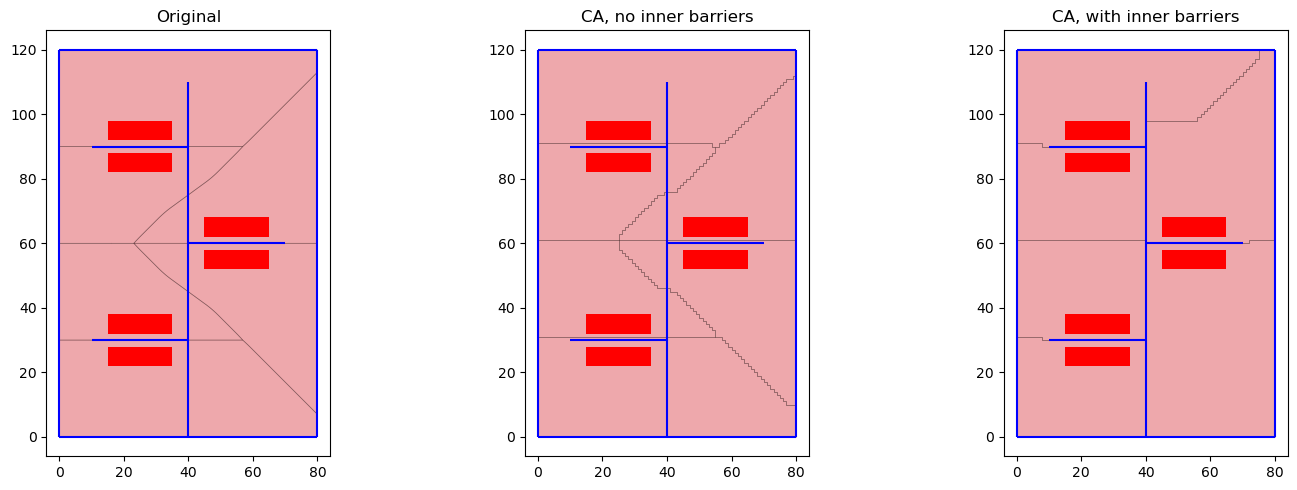

In [4]:
# Generate enclosure
enclosure = enclosures(barrier_gdf)

# Original enclosed_tessellation function
enclosed_tess_original = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosure,
)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

enclosure.plot(ax=axes[0], alpha=0.1)
buildings_gdf.plot(ax=axes[0], color="red")
barrier_gdf.plot(ax=axes[0], color="blue")
enclosed_tess_original.plot(ax=axes[0], alpha=0.3, color="red", edgecolor="black", linewidth=0.5)
axes[0].set_title("Original")

# New enclosed_tessellation function (without inner barriers)
enclosed_tess_no_inner = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosure,
    use_ca=True,
    cell_size=1.0,
    neighbor_mode="moore",
    fulfill=True)

enclosure.plot(ax=axes[1], alpha=0.1)
buildings_gdf.plot(ax=axes[1], color="red")
barrier_gdf.plot(ax=axes[1], color="blue")
enclosed_tess_no_inner.plot(ax=axes[1], alpha=0.3, color="red", edgecolor="black", linewidth=0.5)
axes[1].set_title("CA, no inner barriers")

# New enclosed_tessellation function (with inner barriers)
enclosed_tess_with_inner = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosure,
    use_ca=True,
    cell_size=1.0,
    neighbor_mode="moore",
    fulfill=True,
    barriers_for_inner=barrier_gdf)

enclosure.plot(ax=axes[2], alpha=0.1)
buildings_gdf.plot(ax=axes[2], color="red")
barrier_gdf.plot(ax=axes[2], color="blue")
enclosed_tess_with_inner.plot(ax=axes[2], alpha=0.3, color="red", edgecolor="black", linewidth=0.5)
axes[2].set_title("CA, with inner barriers")

plt.tight_layout()
plt.show()


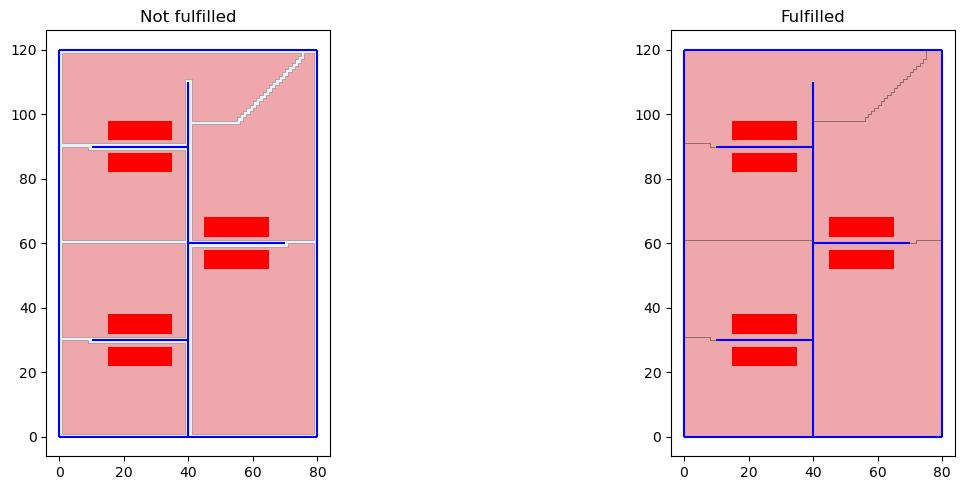

In [6]:
# Generate enclosure
enclosure = enclosures(barrier_gdf)

# Original enclosed_tessellation function
enclosed_tess_original = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosure,
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# New enclosed_tessellation function (without inner barriers)
enclosed_tess_with_inner_1 = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosure,
    use_ca=True,
    cell_size=1.0,
    neighbor_mode="moore",
    fulfill=False,
    barriers_for_inner=barrier_gdf)

enclosure.plot(ax=axes[0], alpha=0.1)
buildings_gdf.plot(ax=axes[0], color="red")
barrier_gdf.plot(ax=axes[0], color="blue")
enclosed_tess_with_inner_1.plot(ax=axes[0], alpha=0.3, color="red", edgecolor="black", linewidth=0.5)
axes[0].set_title("Not fulfilled")

# New enclosed_tessellation function (with inner barriers)
enclosed_tess_with_inner_2 = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosure,
    use_ca=True,
    cell_size=1.0,
    neighbor_mode="moore",
    fulfill=True,
    barriers_for_inner=barrier_gdf)

enclosure.plot(ax=axes[1], alpha=0.1)
buildings_gdf.plot(ax=axes[1], color="red")
barrier_gdf.plot(ax=axes[1], color="blue")
enclosed_tess_with_inner_2.plot(ax=axes[1], alpha=0.3, color="red", edgecolor="black", linewidth=0.5)
axes[1].set_title("Fulfilled")

plt.tight_layout()
plt.show()


In [7]:
from momepy import enclosures

buildings_gdf = gpd.read_file("liverpool_building.geojson")
segments_gdf = gpd.read_file("liverpool_segment.geojson")

# Convert to British National Grid (EPSG:27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)
segments_gdf = segments_gdf.to_crs(epsg=27700)

enclosures = enclosures(segments_gdf)

# Apply the function to each enclosure
enclosed_tess = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosures,
    use_ca=False,
    cell_size=1.0,
    neighbor_mode="moore",
    fulfill=True,
    barriers_for_inner=segments_gdf,
)
enclosed_tess

/opt/anaconda3/envs/city2graph_env/lib/python3.12/site-packages/pandas/core/arraylike.py:492: RuntimeWarning: invalid value encountered in create_collection
  return getattr(ufunc, method)(*new_inputs, **kwargs)


AttributeError: 'NoneType' object has no attribute 'copy'

,geometry,enclosure_index
32,"POLYGON ((333769.036 390200.902, 333769.254 39...",23
107,"POLYGON ((333775.478 390169.634, 333774.742 39...",23
77,"POLYGON ((333657.721 390401.062, 333657.273 39...",25
79,"POLYGON ((333207.318 390429.263, 333130.524 39...",25
81,"POLYGON ((333473.679 390959.737, 333473.488 39...",25
...,...,...
-5,"POLYGON ((334451.405 390135.825, 334451.05 390...",1016
-4,"POLYGON ((334416.704 390170.165, 334415.044 39...",1019
-3,"POLYGON ((334942.085 390188.495, 334947.758 39...",1074
-2,"POLYGON ((334947.888 390181.445, 334949.349 39...",1083


In [5]:
from momepy import enclosures

buildings_gdf = gpd.read_file("liverpool_building.geojson")
segments_gdf = gpd.read_file("liverpool_segment.geojson")

# Convert to British National Grid (EPSG:27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)
segments_gdf = segments_gdf.to_crs(epsg=27700)

enclosures = enclosures(segments_gdf)

# Apply the function to each enclosure
enclosed_tess = enclosed_tessellation(
    buildings_gdf,
    enclosures=enclosures,
    use_ca=True,
    cell_size=1.0,
    neighbor_mode="moore",
    fulfill=True,
    barriers_for_inner=segments_gdf,
)
enclosed_tess

,geometry,enclosure_index
0,"POLYGON ((333586.737 389981.158, 333586.737 38...",23
1,"MULTIPOLYGON (((333587.414 389969.158, 333586....",23
0,"MULTIPOLYGON (((333550.491 390163.663, 333551....",25
1,"POLYGON ((333625.491 390188.663, 333626.491 39...",25
2,"POLYGON ((333304.491 390310.663, 333305.491 39...",25
...,...,...
-5,"POLYGON ((334451.405 390135.825, 334451.05 390...",1016
-4,"POLYGON ((334416.704 390170.165, 334415.044 39...",1019
-3,"POLYGON ((334942.085 390188.495, 334947.758 39...",1074
-2,"POLYGON ((334947.888 390181.445, 334949.349 39...",1083


In [6]:
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import LineString

# Function to check if a segment has a tunnel flag in road_flags
def has_tunnel_flag(road_flags):
    if not isinstance(road_flags, str):
        return False
    try:
        flags = json.loads(road_flags.replace("'", '"'))
        for flag in flags:
            if "values" in flag and "is_tunnel" in flag["values"]:
                return True
        return False
    except Exception:
        return False

# Function to split a line at a given percentage of its length
def split_line_at_percentage(line, percentage):
    if percentage <= 0 or percentage >= 1:
        return (None, line) if percentage <= 0 else (line, None)
    point = line.interpolate(percentage * line.length)
    coords = list(line.coords)
    for i in range(len(coords) - 1):
        segment = LineString([coords[i], coords[i + 1]])
        if segment.distance(point) < 1e-8:
            first_coords = coords[:i+1] + [point.coords[0]]
            second_coords = [point.coords[0]] + coords[i+1:]
            return LineString(first_coords), LineString(second_coords)
    return None, line

#
segments_gdf['has_tunnel'] = segments_gdf['road_flags'].apply(has_tunnel_flag)

# Separate rows that do not contain tunnel information
non_tunnel_rows = segments_gdf[not segments_gdf['has_tunnel']].copy()

# Prepare list to collect new rows for those with tunnels
split_rows = []

# Process each segment that contains tunnel information
for idx, segment in segments_gdf[segments_gdf['has_tunnel']].iterrows():
    seg_id = segment['id']
    geom = segment.geometry
    try:
        flags = json.loads(segment['road_flags'].replace("'", '"'))
        # We will check tunnel flags. If found, split. Otherwise, use the original.
        split_done = False
        for flag in flags:
            if "values" in flag and "is_tunnel" in flag["values"]:
                split_done = True
                between = flag.get("between")
                if between and isinstance(between, list) and len(between) == 2:
                    start_pct, end_pct = between
                    # If needed, split off the non-tunnel part before the tunnel begins.
                    if start_pct > 0:
                        non_tunnel_part, remainder = split_line_at_percentage(geom, start_pct)
                        if non_tunnel_part is not None:
                            new_row = segment.copy()
                            new_row.geometry = non_tunnel_part
                            new_row['part_type'] = 'non_tunnel'
                            split_rows.append(new_row)
                        else:
                            remainder = geom
                    else:
                        remainder = geom
                    # Now split the remainder for tunnel vs after-tunnel
                    if end_pct < 1:
                        # Adjust percentage relative to the remainder
                        adjusted = (end_pct - start_pct) / (1 - start_pct) if start_pct < 1 else 1
                        tunnel_part, after_part = split_line_at_percentage(remainder, adjusted)
                        if tunnel_part is not None:
                            new_row = segment.copy()
                            new_row.geometry = tunnel_part
                            new_row['part_type'] = 'tunnel'
                            split_rows.append(new_row)
                        if after_part is not None:
                            new_row = segment.copy()
                            new_row.geometry = after_part
                            new_row['part_type'] = 'non_tunnel'
                            split_rows.append(new_row)
                    else:
                        # Everything in the remainder is tunnel
                        new_row = segment.copy()
                        new_row.geometry = remainder
                        new_row['part_type'] = 'tunnel'
                        split_rows.append(new_row)
                else:
                    # If no valid "between", mark entire geometry as tunnel.
                    new_row = segment.copy()
                    new_row['part_type'] = 'tunnel'
                    split_rows.append(new_row)
        # If no valid tunnel flag was encountered in flags, keep the row untouched.
        if not split_done:
            new_row = segment.copy()
            new_row['part_type'] = 'non_tunnel'
            split_rows.append(new_row)
    except Exception as e:
        print(f"Error processing {seg_id}: {e}")
        new_row = segment.copy()
        new_row['part_type'] = 'non_tunnel'
        split_rows.append(new_row)

# Combine the split tunnel rows with the rows that never had tunnel flags
tunnel_split_gdf = gpd.GeoDataFrame(split_rows, crs=segments_gdf.crs)
segments_gdf = gpd.GeoDataFrame(
    pd.concat([non_tunnel_rows, tunnel_split_gdf], ignore_index=True),
    crs=segments_gdf.crs
)

# Fulfill None with non_tunnel
segments_gdf['part_type'] = segments_gdf['part_type'].fillna('non_tunnel')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: aspect must be finite and positive 

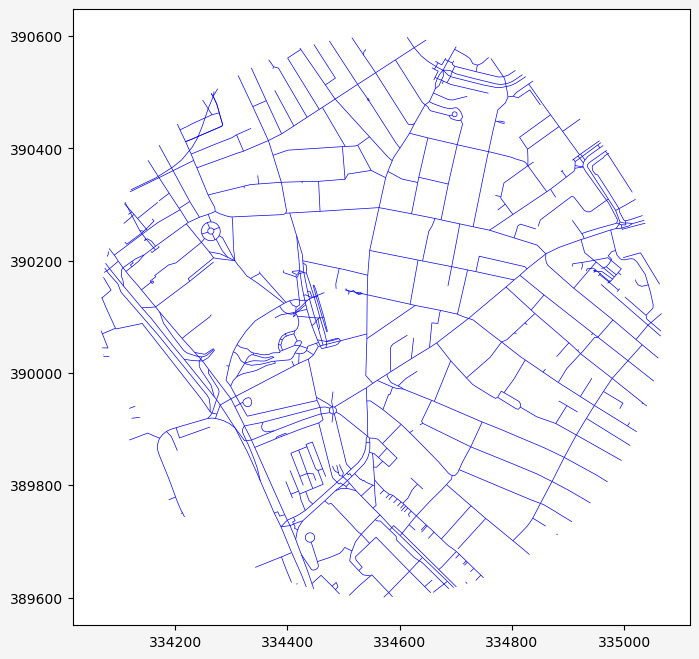

In [ ]:
from shapely.geometry import Point

# Create a point from the given coordinates (longitude, latitude)
pt = gpd.GeoSeries([Point(-2.985662724, 53.403665052)], crs="EPSG:4326")
# Reproject the point to the same CRS as buildings_gdf/segments_gdf/enclosed_tess (assumed EPSG:27700)
pt_27700 = pt.to_crs(epsg=27700)

# Create a circular buffer of 100 meters around the point
buffer = pt_27700.buffer(500).iloc[0]


# Convert crs to EPSG:27700
enclosed_tess = enclosed_tess.to_crs(epsg=27700)
merged_gdf = merged_gdf.to_crs(epsg=27700)
buildings_gdf = buildings_gdf.to_crs(epsg=27700)

# Clip each layer by the buffer
enclosed_tess_clip = enclosed_tess.clip(buffer)
segments_clip = merged_gdf.clip(buffer)
buildings_clip = buildings_gdf.clip(buffer)

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))

# Plot enclosed tessellation boundaries in red
#enclosed_tess_clip.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=1, label="Enclosed Tessellation")
# Plot segments in blue
segments_clip.plot(ax=ax, color="blue", linewidth=0.5, label="Segments")
# Plot buildings in green with some transparency
buildings_clip.plot(ax=ax, color="green", alpha=0.5, label="Buildings")

# Optionally, plot the buffer boundary for reference
gpd.GeoSeries([buffer]).boundary.plot(ax=ax, color="black", linestyle="--", label="Buffer 100m")

ax.set_title("Cropped 100m Radius (from 53.403665052, -2.985662724)")
ax.set_aspect("equal")
plt.legend()
plt.show()

In [103]:
import folium, json

places_gdf = gpd.read_file("liverpool_place.geojson").to_crs(epsg=4326)


# Create base map centered on Liverpool
m = folium.Map([53.4084, -2.9916], zoom_start=13, tiles="cartodbpositron")

# Convert enclosures to WGS84 (EPSG:4326) for folium
enclosures = enclosures.to_crs(epsg=4326)
#enclosures = enclosures[enclosures.geom_type != "MultiLineString"]
# Plot all enclosures in gray
folium.GeoJson(
    enclosures,
    style_function=lambda x: {
        'fillColor': 'gray',
        'color': 'gray',
        'weight': 1,
        'fillOpacity': 0.1
    },
    tooltip=folium.GeoJsonTooltip(fields=['eID'])
).add_to(m)

# Convert enclosed_tess to WGS84 (EPSG:4326) for folium
enclosed_tess = enclosed_tess.to_crs(epsg=4326)

# Add enclosed tessellation polygons to the map
folium.GeoJson(
    enclosed_tess,
    style_function=lambda x: {
        'fillColor': 'none',
        'color': 'red',
        'weight': 1,
        'opacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(fields=['enclosure_index'])
).add_to(m)

# Convert buildings_gdf to WGS84 (EPSG:4326) and add to the map
buildings_gdf = buildings_gdf.to_crs(epsg=4326)

folium.GeoJson(
    buildings_gdf,
    style_function=lambda x, color="blue": {
        'fillColor': color,
        'color': color,
        'weight': 0,
        'fillOpacity': 0.6
    },
    tooltip=folium.GeoJsonTooltip(fields=['id'])
).add_to(m)

# Add GeoJson layer with style
folium.GeoJson(
    segments_gdf.to_crs(epsg=4326),
    style_function=lambda feature: {
        'color': 'blue',
        'weight': 2,
        'opacity': 0.6,
    },
    tooltip=folium.GeoJsonTooltip(fields=['class', 'subtype'])
).add_to(m)

for idx, row in places_gdf.iterrows():
    popup_text = (
        f"Name: {json.loads(row['names'])['primary'] if isinstance(row['names'], str) else None}<br>"
        f"Categories: {json.loads(row['categories'])['primary'] if isinstance(row['categories'], str) else None}"
    )
    
    # Define color based on the primary category
    category = json.loads(row['categories'])['primary'] if isinstance(row['categories'], str) and row['categories'] else 'other'
    
    # Map categories to colors
    color_map = {
        'accommodation': 'blue',
        'food': 'green',
        'shop': 'orange',
        'attraction': 'purple',
        'museum': 'darkpurple',
        'bar': 'darkred',
        'restaurant': 'lightgreen',
        'college_university': 'cadetblue',
        'school': 'lightblue',
        'theatre': 'pink',
        'cinema': 'darkgreen',
        'resort': 'lightred'
    }
    
    color = color_map.get(category, 'blue')  # Default to gray for unknown categories
    
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        popup=folium.Popup(popup_text, max_width=300),
        color=color,
        fill=True,
        fillColor=color,
        fillOpacity=0.7,
        
    ).add_to(m)

m

Skipping field websites: unsupported OGR type: 5
Skipping field socials: unsupported OGR type: 5
Skipping field phones: unsupported OGR type: 5


KeyboardInterrupt: 

### Data summary (Overture Maps)

```
types = ["address", "bathymetry", "building", "building_part", "division", "division_area", 
"division_boundary", "place", "segment", "connector", "infrastructure", "land", "land_cover", "land_use", "water"]
```

`address` : unknown (empty in the case of Liverpool)

`bathymetry` : depth of water from ETOPO GLOBathy

`building` : building footprints from OSM and Microsoft ML Buildings

`building_part` : comprementary part of building footprints? seemingly from OSM

`division` : division of jurisdiction from OSM (with tags of Wikidata)

`division_area` : area of the division as polygons from OSM and geoBoundaries

`division_boundary` : unknown (empty in the case of Liverpool)

`place` : POIs mainly from Meta
`segment` : streets from OSM

`connector` : intersections from OSM
`infrastructure` : barriers from OSM

`land` : ?

`land_cover` : ?

`land_use` : ?

`water` : ?

### Functions needed

- a function that cleans up `building_part` and merge them into `building`
- a function that partitions the `building` into plot systems (using `connector` (nodes) and `segment` (edges))
- a function that identifies the adjacency of plot systems to `segment`
- a function that constructs a networkx graph from `connector` (nodes) and `segment` (edges)
- a function that flips the networkx graph to the dual graph (`connector` (edges) and `segment` (nodes))
- a function that maps `place` as POIs onto the plot systems
- a function that maps `land_use` onto the plot systems
- a function that converts plot systems and into networkx graph

### Notes

Since the `connector` and `segment` are from OSM, osmnx can be used to create & manipulate the networkx graph
The merit of using Overture Maps is the availability of `place` (POIs) mainly from Meta
The merit of using Overture Maps is the availability of `building` both from OSM and Microsoft ML Buildings
Some of the `place` (POIs) are in the area of `segment`
`place` (POIs) are not well covered compared to OSM sometimes
JSON needs to be cleaned up by renaming attributes (in particular, it should be globally standarised for the paper 2)